C:\Users\antos\AppData\Local\Temp\ipykernel_15860\778980658.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  snapshot_df = pd.concat([snapshot_df, snapshot], ignore_index=True)


        marketCap (mld)  trailingPE   forwardPE  returnOnEquity  \
symbol                                                            
AAPL        4047.612150   36.719166   32.963295         1.71422   
MSFT        3754.614325   35.904053   33.790638         0.32241   
TSLA        1452.365316  297.070740  134.782100         0.06791   
GOOGL       3493.745918   28.587944   32.289062         0.35450   

        dividendYield   beta  
symbol                        
AAPL             0.39  1.109  
MSFT             0.72  1.065  
TSLA              NaN  1.872  
GOOGL            0.29  1.082  


C:\Users\antos\AppData\Local\Temp\ipykernel_15860\778980658.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  snapshot_df = pd.concat([snapshot_df, snapshot], ignore_index=True)


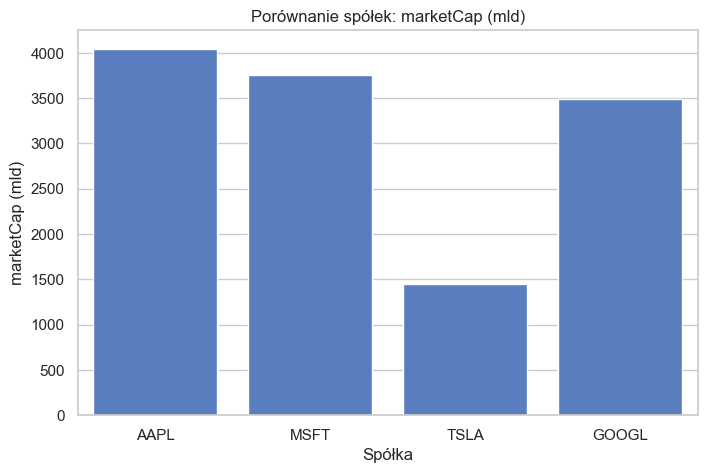

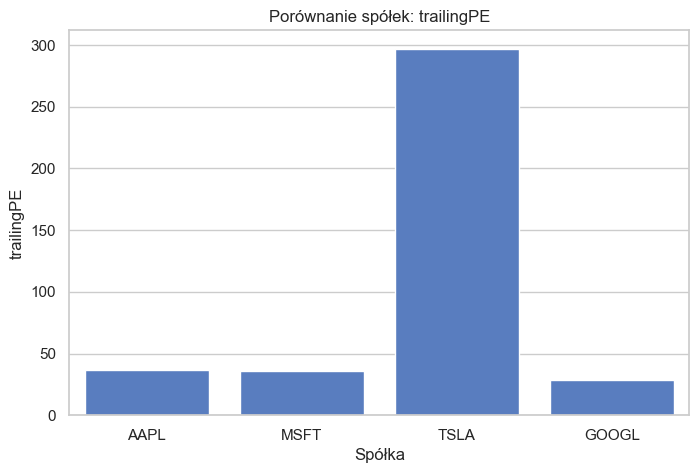

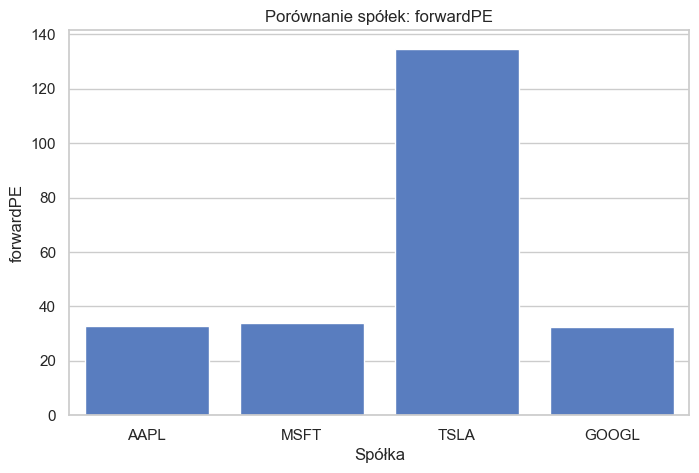

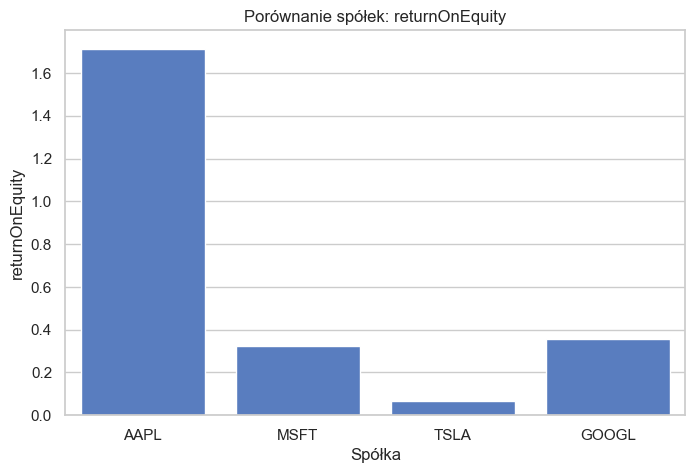

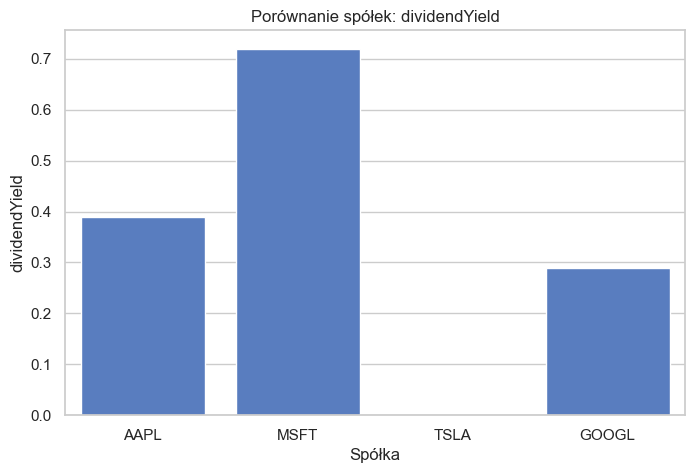

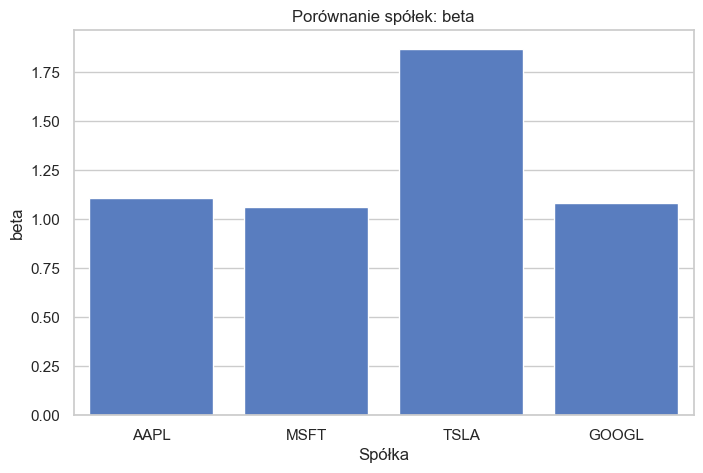

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from modules import get_full_company_snapshot

companies = ['AAPL', 'MSFT', 'TSLA', 'GOOGL']

# wworzymy pusty DataFrame, w którym zbierzemy dane
snapshot_df = pd.DataFrame()

for company in companies:
    try:
        snapshot = get_full_company_snapshot(company)
        snapshot['symbol'] = company
        snapshot_df = pd.concat([snapshot_df, snapshot], ignore_index=True)
    except Exception as e:
        print(f"Błąd przy pobieraniu danych dla {company}: {e}")

# wybieramy wskaźniki do porównania
metrics = ['marketCap (mld)', 'trailingPE', 'forwardPE', 'returnOnEquity', 'dividendYield', 'beta']

# wyciągamy tylko potrzebne kolumny
compare_df = snapshot_df[['symbol'] + metrics].set_index('symbol')


print(compare_df)


sns.set(style='whitegrid', palette='muted')

# funkcja do wykresów porównawczych
def plot_metric(metric):
    plt.figure(figsize=(8,5))
    sns.barplot(x=compare_df.index, y=compare_df[metric])
    plt.title(f'Porównanie spółek: {metric}')
    plt.ylabel(metric)
    plt.xlabel('Spółka')
    plt.show()

# tworzymy wykresy dla wszystkich wybranych wskaźników
for metric in metrics:
    plot_metric(metric)
